<a href="https://colab.research.google.com/github/bannis14/Data-Science-Projects/blob/main/Python/Time_Series_Forecasting_Product/Exploratory_Data_Analysis/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA for Time Series Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Time Series Forecasting Product/Exploratory Data Analysis

/content/drive/MyDrive/Time Series Forecasting Product/Exploratory Data Analysis


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf
import matplotlib.pyplot as plt

In [ ]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/Time Series Forecasting Product/nyc_data.csv', index_col=0, parse_dates=True)
df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


In [ ]:
# Rename variable
df = df.rename(columns={'Demand': 'y'})
df.head()

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


## Data Analysis

In [ ]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
y,2192.0,756.059227,152.143070,425.77532,641.161123,736.94763,855.645886,1384.908525
Easter,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Thanksgiving,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Christmas,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Temperature,2192.0,15.012655,8.772751,-8.85000,7.767500,14.89500,23.230000,30.900000
Marketing,2192.0,126.675890,58.274047,24.58900,78.303500,122.76450,169.395250,299.860000


## Seasonal Decomposition

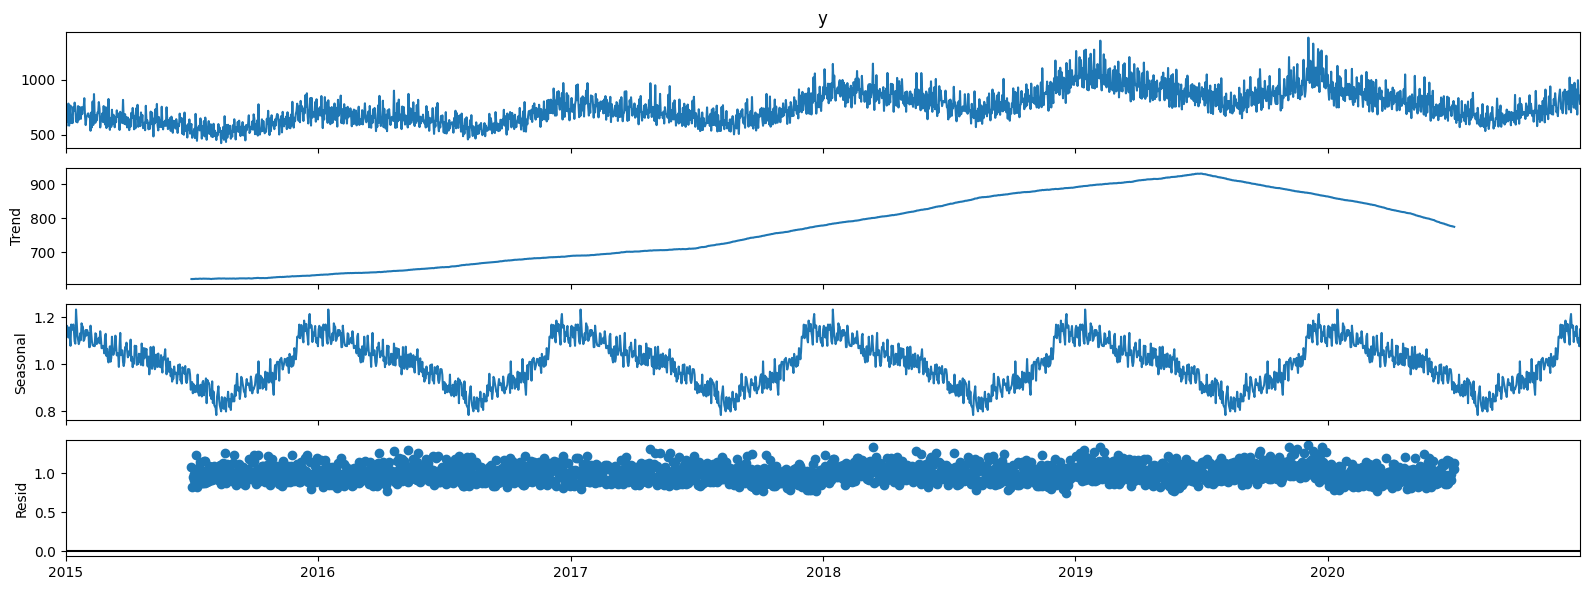

In [ ]:
# decomposition
decomposition = seasonal_decompose(x=df.y, model='multiplicative', period=365)
decomposition.plot();

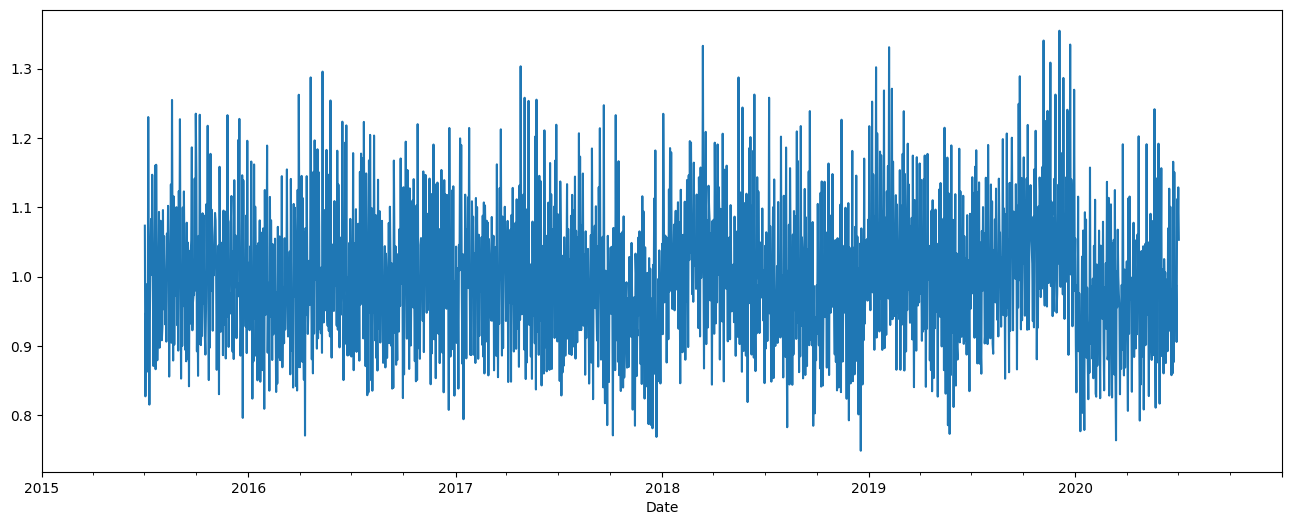

In [ ]:
#Plotting
decomposition.resid.plot();

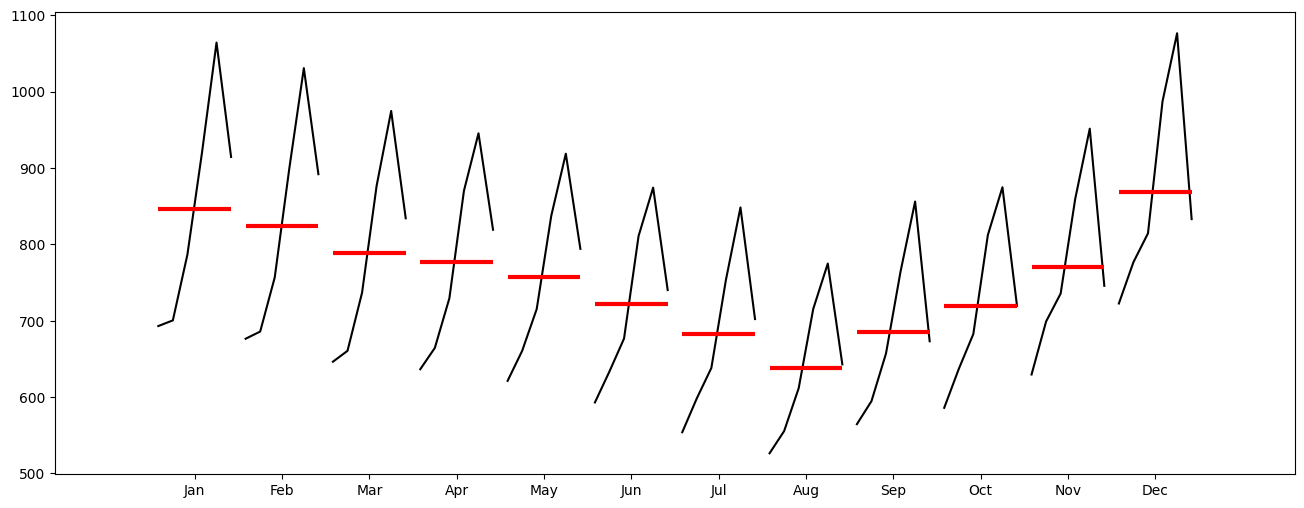

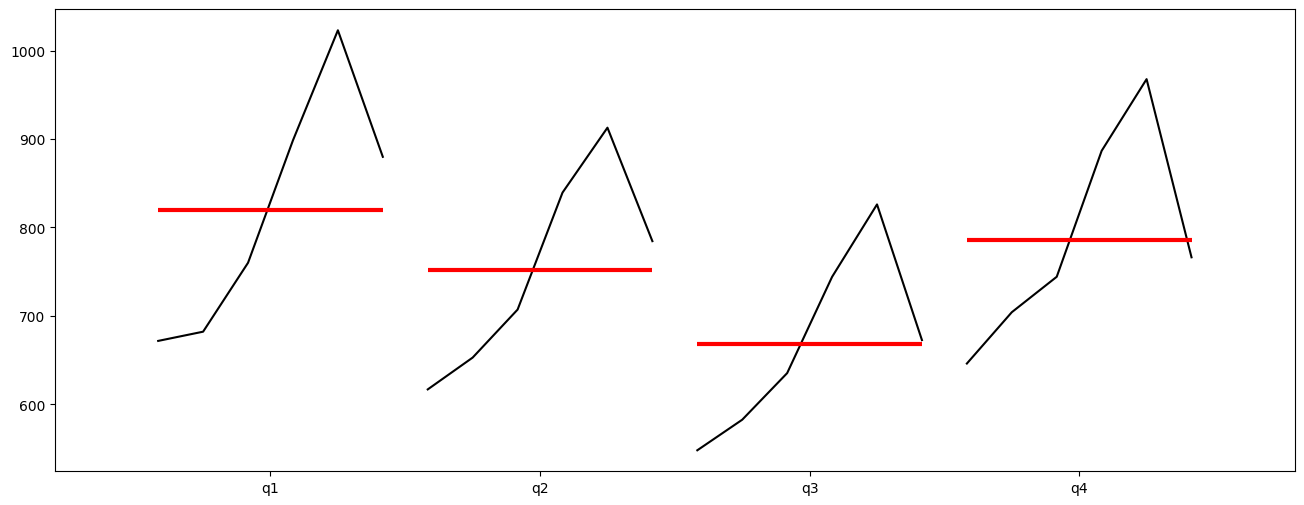

In [ ]:
## Seasonal Graphs
month_plot(df.y.resample(rule='MS').mean());
quarter_plot(df.y.resample(rule='Q').mean());

In [ ]:
# Aggregating on specific time frame
df.y.resample(rule='MS').mean()

Date
2015-01-01    692.967611
2015-02-01    676.381042
2015-03-01    646.326069
2015-04-01    636.463333
2015-05-01    621.211624
                 ...    
2020-08-01    642.785119
2020-09-01    673.093698
2020-10-01    719.514838
2020-11-01    745.599826
2020-12-01    832.963040
Freq: MS, Name: y, Length: 72, dtype: float64

## Advanced Visualization

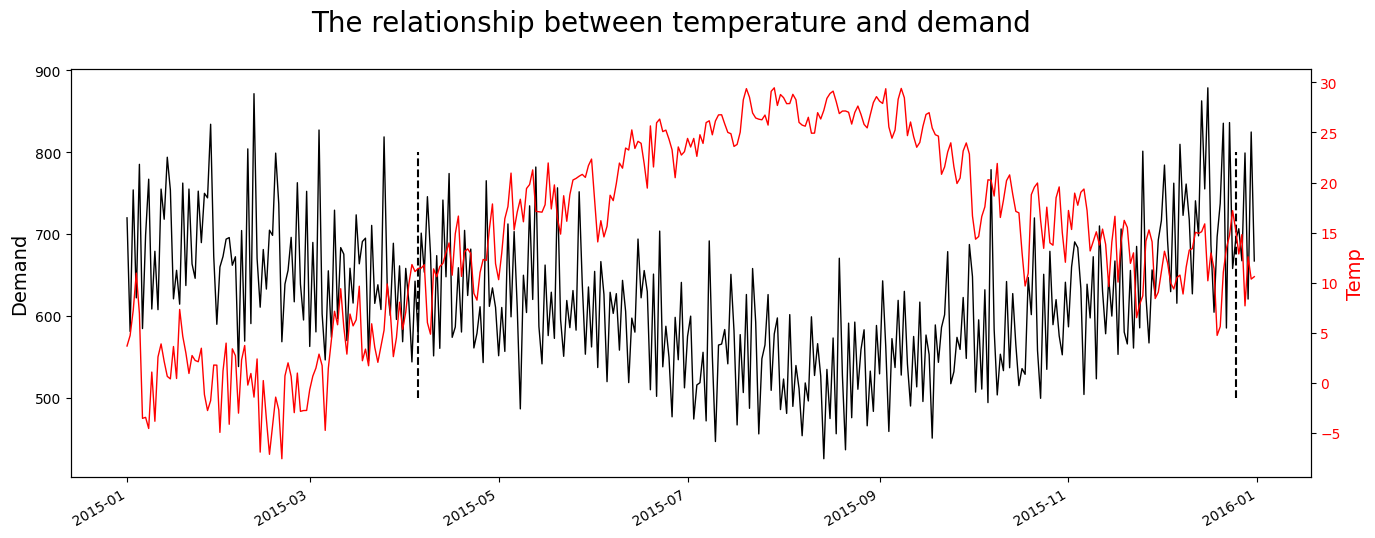

In [ ]:
# Create a version B of the data frame
df_plot = df.loc['2015-01-01':'2015-12-31']

# Define the colors
temp_color = 'red'
y_color = 'black'

# Plot
fig, ax1 = plt.subplots(figsize=(16, 6))
ax2 = ax1.twinx()

## Data and Lines
ax1.plot(df_plot.index, df_plot.y, color=y_color, lw=1)
ax2.plot(df_plot.index, df_plot.Temperature, color=temp_color, lw=1)

# Title and Dates
fig.suptitle('The relationship between temperature and demand', fontsize=20)
fig.autofmt_xdate()

# first axis
ax1.set_label('Date')
ax1.tick_params(axis='y', labelcolor=y_color)
ax1.set_ylabel('Demand', color=y_color, fontsize=14)

# Second axis
ax2.tick_params(axis='y', labelcolor=temp_color)
ax2.set_ylabel('Temp', color=temp_color, fontsize=14)

# Add holidays or events
events = df_plot[(df_plot.Easter == 1) | (df_plot.Christmas == 1)].index
ax1.vlines(x=events, ymin=500, ymax=800, color='k', ls='--');

In [ ]:
# correlation
df[['y', 'Temperature', 'Marketing']].corr()

,y,Temperature,Marketing
y,1.000000,-0.400261,0.275139
Temperature,-0.400261,1.000000,-0.185626
Marketing,0.275139,-0.185626,1.000000


In [ ]:
# ACF plot
plt.rcParams["figure.figsize"] = (16, 6)
plot_acf(df.y)
plt.show();